In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import pickle 
print(pickle.format_version)

4.0


In [13]:
housing = pd.read_csv("housing 2.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [14]:
housing.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [15]:
housing["total_bedrooms"].astype

<bound method NDFrame.astype of 0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64>

In [16]:
housing["total_bedrooms"].fillna(housing["total_bedrooms"].mean(), inplace = True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [17]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Numerical Values

<AxesSubplot: ylabel='Frequency'>

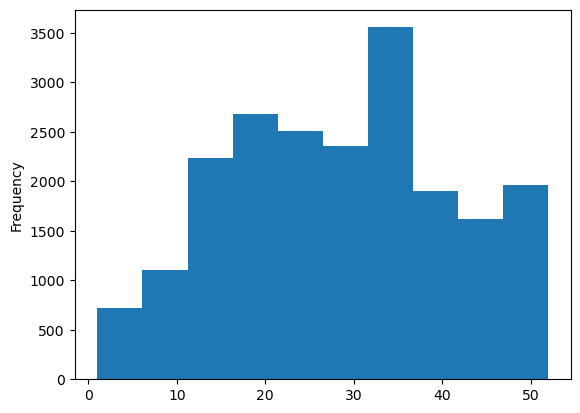

In [18]:
(housing["housing_median_age"]).plot(kind = "hist")

<AxesSubplot: ylabel='Frequency'>

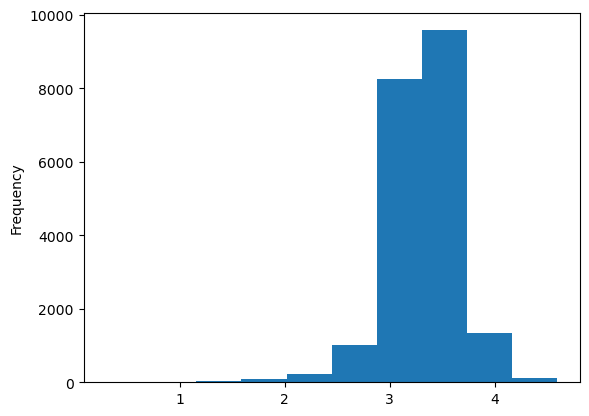

In [19]:
np.log10(housing["total_rooms"]).plot(kind = "hist")

<AxesSubplot: ylabel='Frequency'>

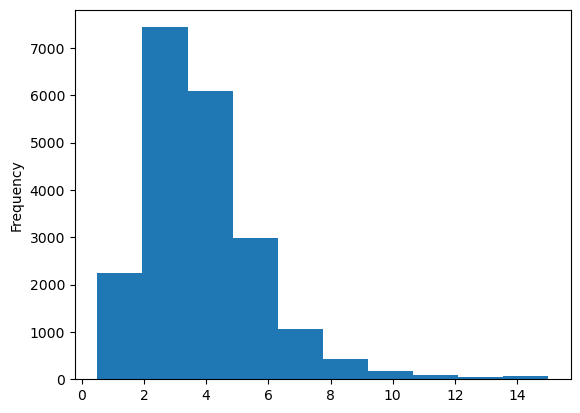

In [20]:
(housing["median_income"]).plot(kind = "hist")

<AxesSubplot: ylabel='Frequency'>

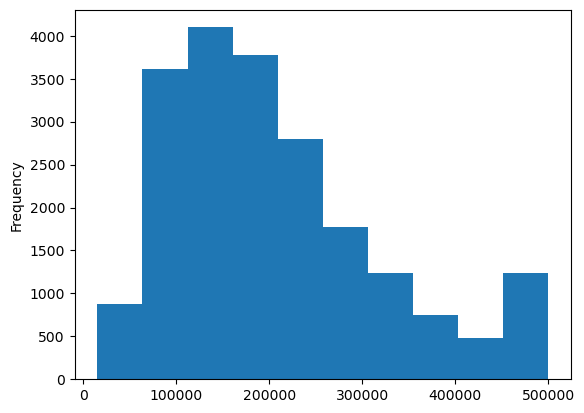

In [21]:
(housing["median_house_value"]).plot(kind = "hist")

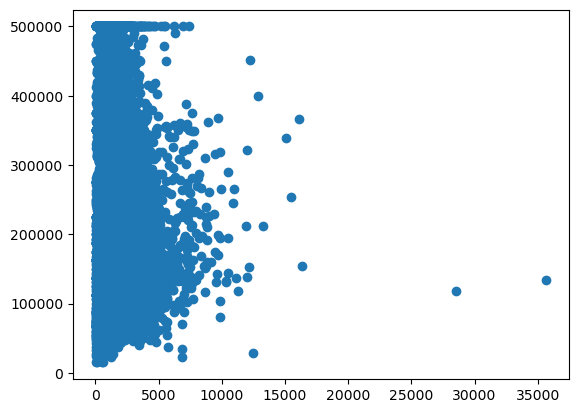

In [22]:
plt.scatter(housing["population"], housing["median_house_value"])

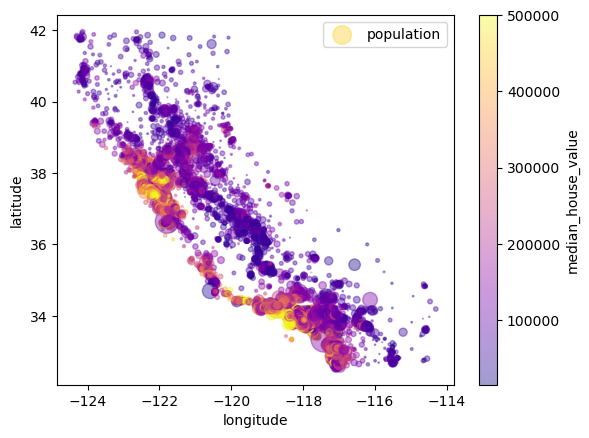

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=housing["population"]/100, label="population",c="median_house_value", cmap=plt.get_cmap("plasma"), colorbar=True,)
plt.legend()

<AxesSubplot: ylabel='Frequency'>

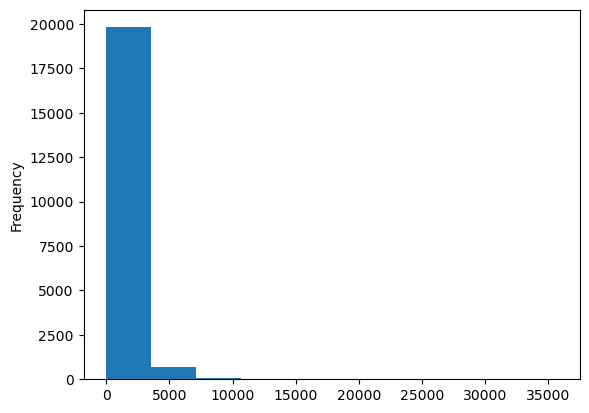

In [24]:
(housing["population"]).plot(kind = "hist")

<AxesSubplot: ylabel='Frequency'>

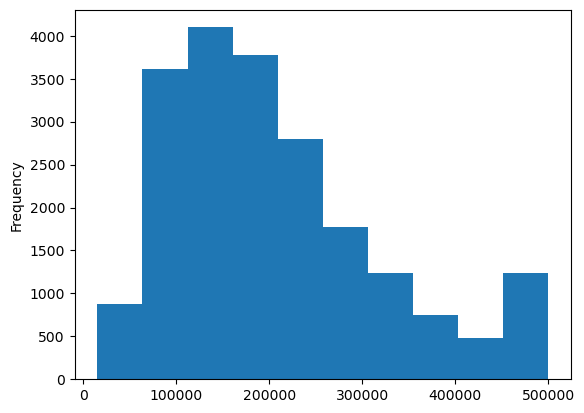

In [25]:
(housing["median_house_value"]).plot(kind = "hist")

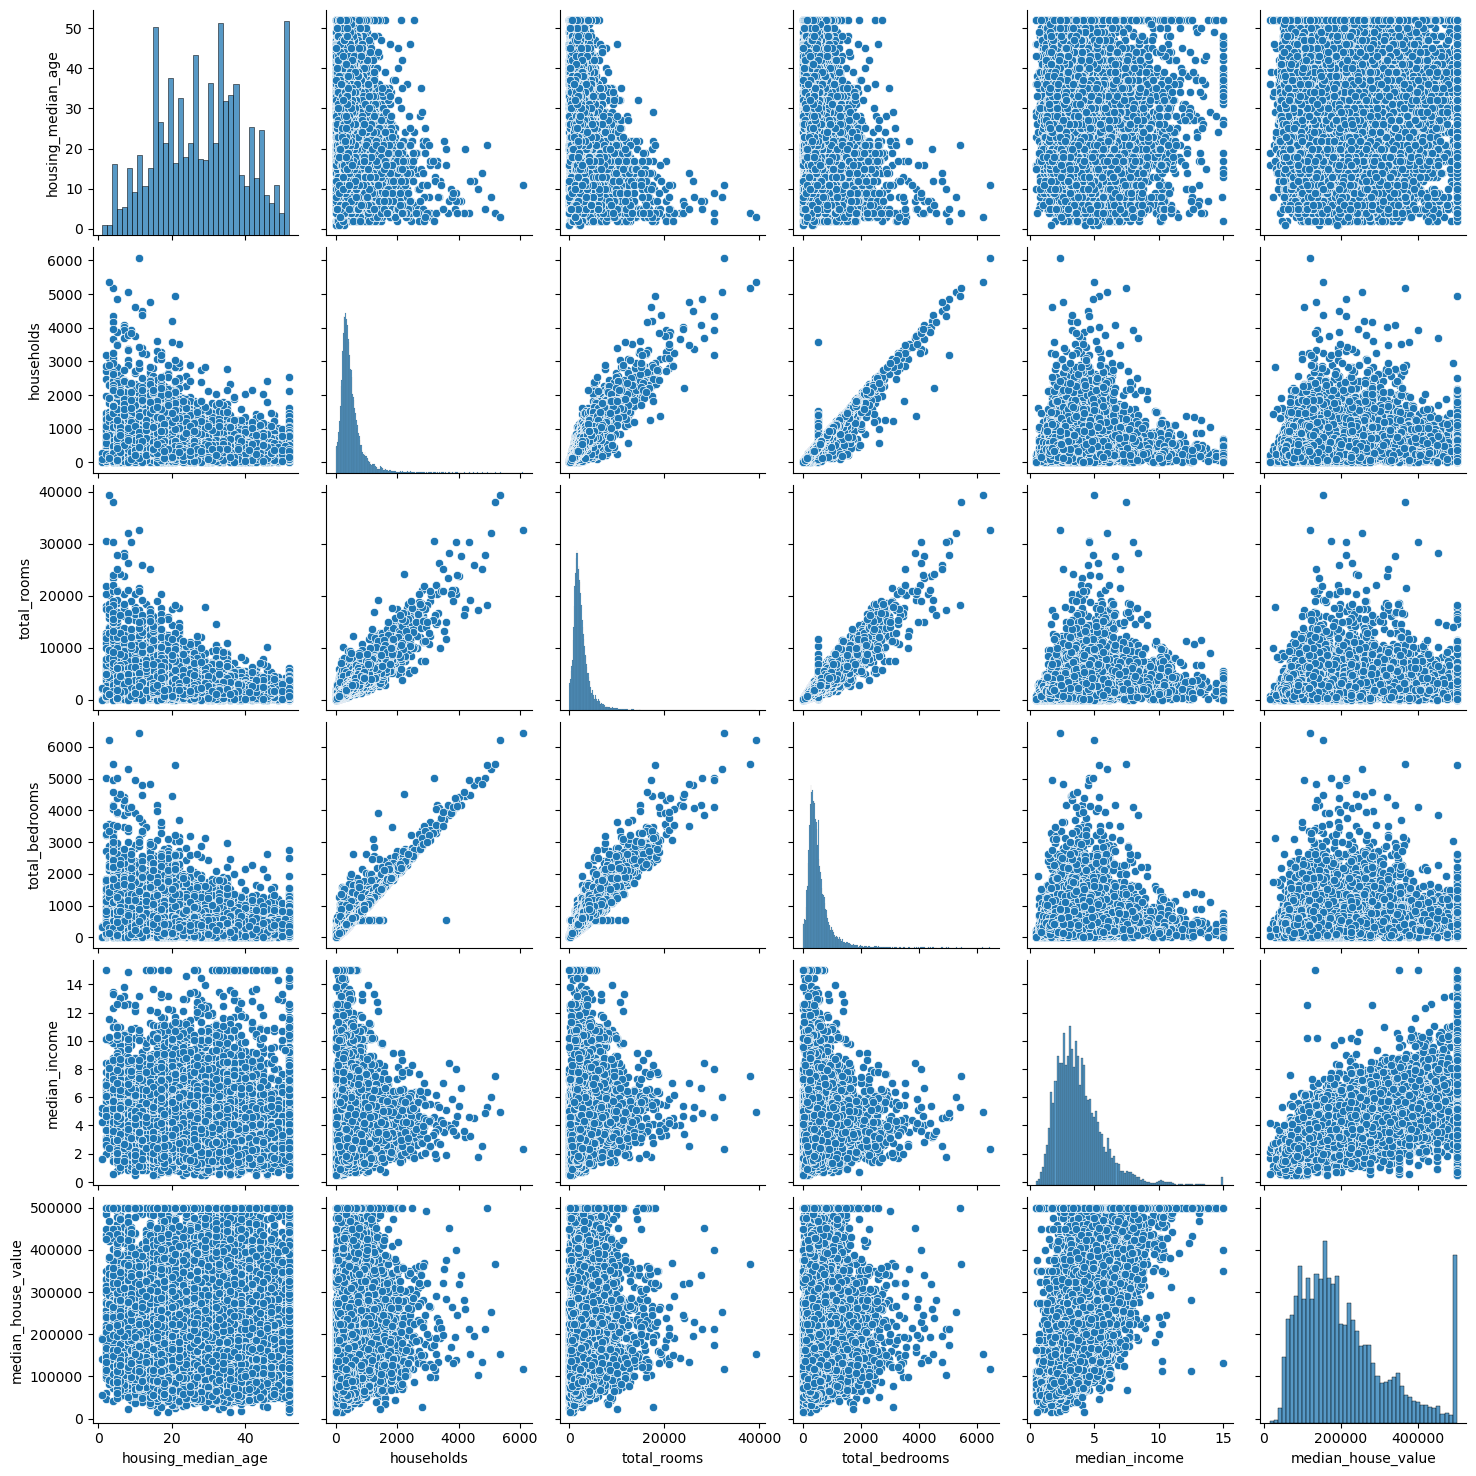

In [26]:
num_features = ["housing_median_age", "households", "total_rooms", "total_bedrooms", "median_income", "median_house_value"]

sns.pairplot(housing[num_features])

In [27]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


**CATEGORICAL ATTRIBUTES**

<AxesSubplot: >

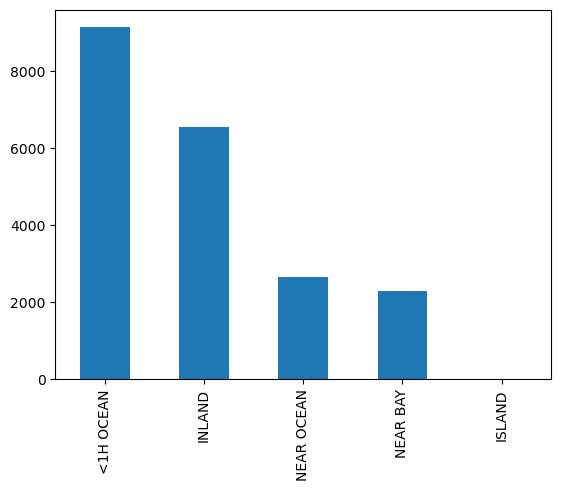

In [28]:
(housing["ocean_proximity"].value_counts()).plot(kind = "bar")

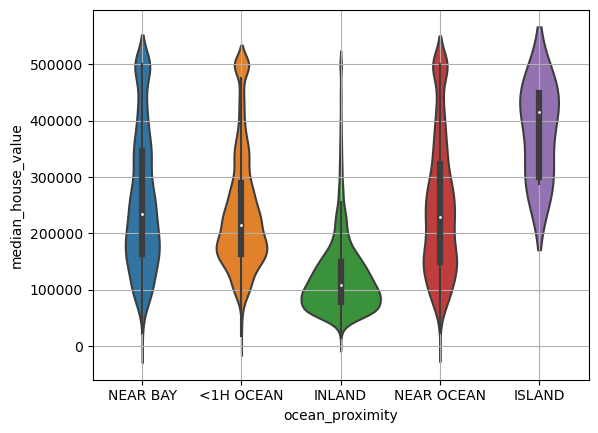

In [29]:
sns.violinplot(data = housing, x = housing["ocean_proximity"], y = (housing["median_house_value"]))
plt.grid()

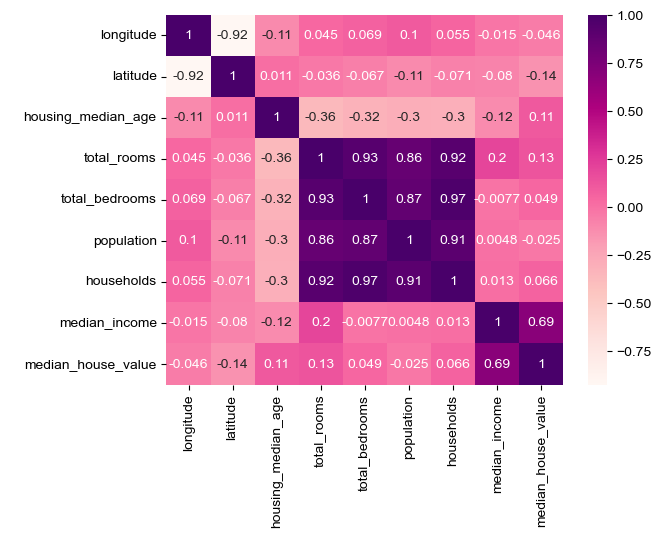

In [30]:
sns.heatmap(housing.corr(), annot = True, cmap = "RdPu")
sns.set(rc = {'figure.figsize':(15,15)})

In [31]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [32]:
ocean_encoded = pd.get_dummies(housing["ocean_proximity"], drop_first = True)

In [33]:
housing = pd.concat([housing, ocean_encoded], axis = 1)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1,0,0,0


In [34]:
housing.drop("ocean_proximity", axis = 1, inplace = True)

In [35]:
last_column = housing.pop('median_house_value')
housing.insert(12, "median_house_value", last_column)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1,0,0,0,84700.0


In [36]:
X = housing.iloc[:, :12]
y = housing.iloc[:, -1]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,0,0,0,1
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,0,0,0,1
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,0,0,0,1
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,0,0,0,1
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,0,0,0,0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,1,0,0,0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,0,0,0,0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,0,0,0,0


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_features=6, n_estimators=30)
forest.fit(X_train, y_train)

RandomForestRegressor(max_features=6, n_estimators=30)

In [40]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 6,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [41]:
y_pred = forest.predict(X_test)

In [42]:
residual = y_test - y_pred
residual

20046    -2763.333333
3024    -22126.666667
15663    52883.966667
20484   -50650.033333
9814      7750.000000
             ...     
15362    53820.000000
16623    30660.000000
18086     2923.366667
2144      -826.666667
3665    -14216.666667
Name: median_house_value, Length: 4128, dtype: float64

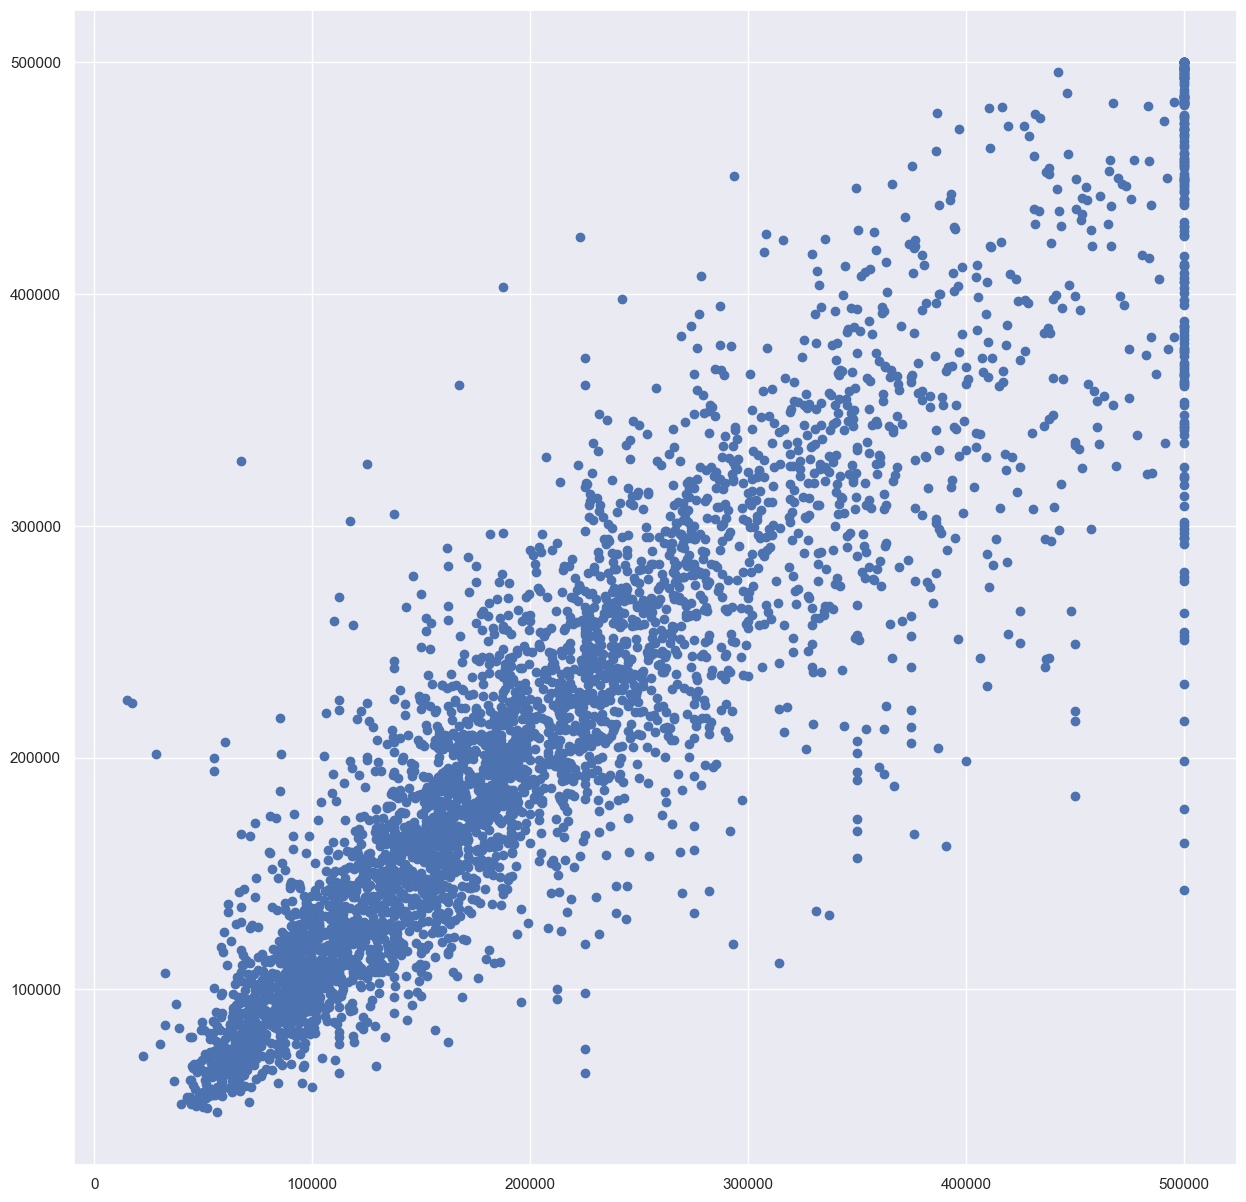

In [43]:
plt.scatter(y_test, y_pred)

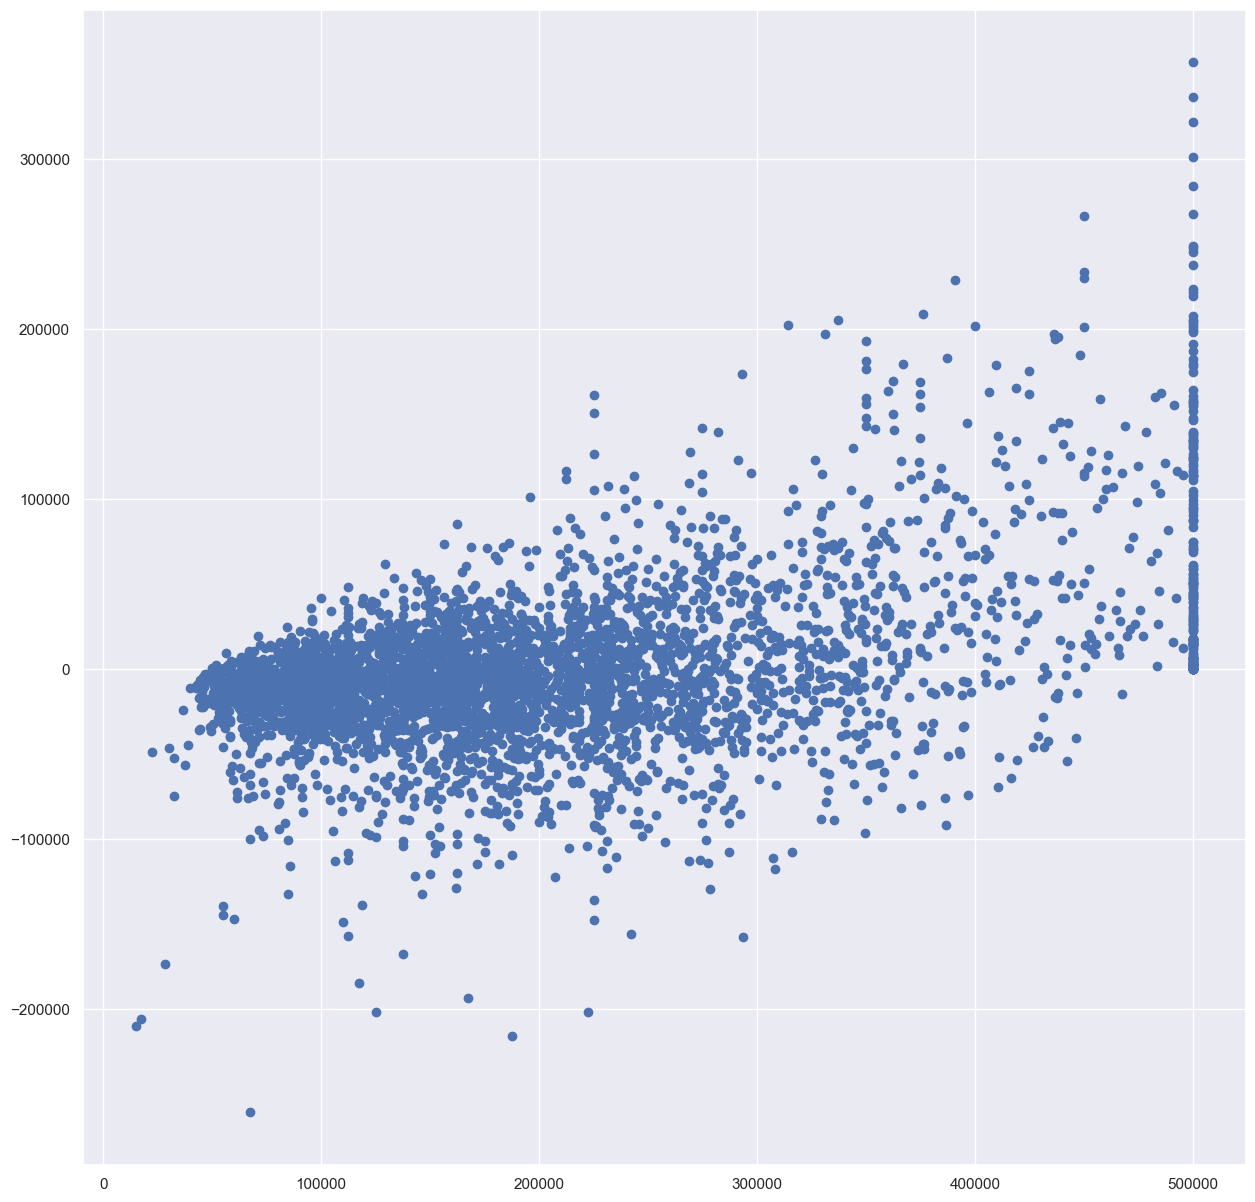

In [44]:
plt.scatter(y_test, residual)

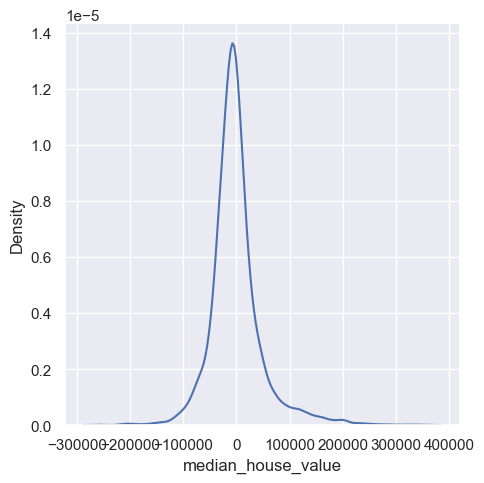

In [45]:
sns.displot(residual, kind = "kde")

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
print(rmse)
print(mae)

49236.35117970154
32355.2351501938


In [47]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.815002925213075

In [48]:
1 - (1 - score)*(len(y_test) - 1)/(len(y_test) - X_test.shape[1]-1)

0.8144634440715336

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameters = [{"n_estimators":[10, 20, 30], "max_features":[3, 6, 9 ,12]},
             {"bootstrap": [False], "n_estimators":[5,10], "max_features":[2,3,4]}]

grid = GridSearchCV(forest, parameters, cv = 10, scoring = "neg_mean_squared_error")

In [51]:
grid.fit(X_test, y_pred)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_features=6, n_estimators=30),
             param_grid=[{'max_features': [3, 6, 9, 12],
                          'n_estimators': [10, 20, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [5, 10]}],
             scoring='neg_mean_squared_error')

In [52]:
grid.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [53]:
res = grid.cv_results_
for mean_score, parameters in zip(res["mean_test_score"], res["params"]):
    print(np.sqrt(-mean_score), parameters)

29143.93946532926 {'max_features': 3, 'n_estimators': 10}
27734.827037363455 {'max_features': 3, 'n_estimators': 20}
27478.404676832964 {'max_features': 3, 'n_estimators': 30}
26284.176455402525 {'max_features': 6, 'n_estimators': 10}
25425.22676828308 {'max_features': 6, 'n_estimators': 20}
24406.67730487991 {'max_features': 6, 'n_estimators': 30}
25989.814587953086 {'max_features': 9, 'n_estimators': 10}
25188.428766520312 {'max_features': 9, 'n_estimators': 20}
24788.515887930433 {'max_features': 9, 'n_estimators': 30}
26503.956872710696 {'max_features': 12, 'n_estimators': 10}
25300.765906271943 {'max_features': 12, 'n_estimators': 20}
25178.83971199153 {'max_features': 12, 'n_estimators': 30}
35523.583839268205 {'bootstrap': False, 'max_features': 2, 'n_estimators': 5}
31745.23524266036 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
30875.038539468478 {'bootstrap': False, 'max_features': 3, 'n_estimators': 5}
27869.156890105733 {'bootstrap': False, 'max_features': 3, 

In [54]:
grid.best_estimator_.feature_importances_

array([9.38208105e-02, 9.37823488e-02, 3.30589336e-02, 2.32446132e-02,
       1.68903439e-02, 2.36383285e-02, 1.46530088e-02, 4.65659630e-01,
       2.26323610e-01, 3.73633494e-06, 1.73233972e-03, 7.19229714e-03])

In [55]:
X.to_numpy()[0].reshape(1, -1)

array([[-122.23  ,   37.88  ,   41.    ,  880.    ,  129.    ,  322.    ,
         126.    ,    8.3252,    0.    ,    0.    ,    1.    ,    0.    ]])

In [56]:
sc.transform(X.to_numpy()[0].reshape(1, -1))

/Users/nonsoalumona/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.32016306,  1.04692041,  0.98330419, -0.81027328, -0.9773325 ,
        -0.97135592, -0.98170523,  2.33397811, -0.68057418, -0.01556621,
         2.81178749, -0.3802631 ]])

In [57]:
forest.predict(sc.transform(X.to_numpy()[0].reshape(1, -1)))

/Users/nonsoalumona/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([431883.8])

In [58]:
import pickle

In [59]:
pickle.dump(forest, open("forestmodel.pkl", "wb"))

In [61]:
model_pickled = pickle.load(open("forestmodel.pkl", "rb"))

In [62]:
#Verifying Predictions

model_pickled.predict(sc.transform(X.to_numpy()[0].reshape(1, -1)))

/Users/nonsoalumona/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([431883.8])